In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('house.csv')

In [3]:
df.head()

,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
0,2,0,1035000,1,23,2.5,3067,1,0,156,79.0,1900,31,144.9934,2,4019
1,3,0,1465000,3,23,2.5,3067,2,0,134,150.0,1900,31,144.9944,2,4019
2,4,0,1600000,4,155,2.5,3067,1,2,120,142.0,2014,31,144.9941,2,4019
3,3,0,1876000,1,155,2.5,3067,2,0,245,210.0,1910,31,144.9993,2,4019
4,2,0,1636000,1,155,2.5,3067,1,2,256,107.0,1890,31,144.9954,2,4019


In [4]:
X = df.drop('Price',axis = 1)
y = df['Price']

In [5]:
X.columns

Index(['Rooms', 'Type', 'Method', 'SellerG', 'Distance', 'Postcode',
       'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt',
       'CouncilArea', 'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

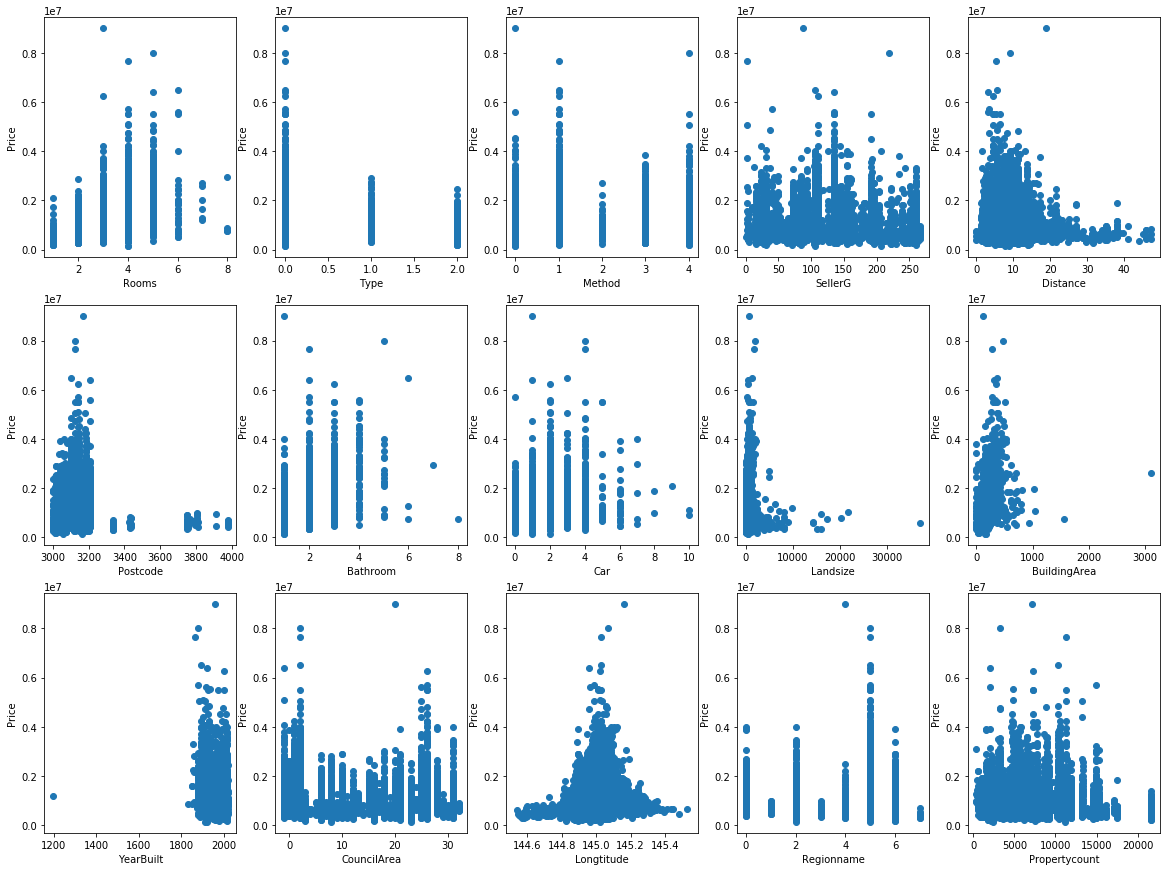

In [6]:
plt.figure(figsize=(20,15))

i = 1
for col in X.columns:
    plt.subplot(3,5,i)
    plt.scatter(df[col],y)
    plt.xlabel(col)
    plt.ylabel('Price')
    i+=1
plt.show()
    
    

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=6)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lin = LinearRegression()

In [26]:
lin.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
y_pred = lin.predict(X_test)

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
def evaluate(y,ypred):
    return np.sqrt(mean_squared_error(y,ypred)), r2_score(y,ypred)

In [30]:
evaluate(y_test,y_pred)

(416477.457591679, 0.610875922874348)

In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [32]:
model = make_pipeline(PolynomialFeatures(2),LinearRegression())

In [34]:
model.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [35]:
y_pred_p = model.predict(X_test)

In [36]:
evaluate(y_test,y_pred_p)

(357234.73479808524, 0.7137058565315779)

In [38]:
from sklearn.linear_model import Lasso, Ridge

In [46]:
r = Ridge(alpha=10)

r.fit(X_train,y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [47]:
r.coef_

array([ 1.33562086e+05, -1.59362523e+05, -8.80651894e+03, -1.71648596e+02,
       -4.66156833e+04,  1.34368049e+03,  2.08588614e+05,  4.34884239e+04,
        1.63620665e+01,  1.55226812e+03, -3.10972634e+03, -4.00218388e+03,
        1.13048232e+06,  4.06802211e+04, -2.91014774e-01])

In [48]:
y_pred_r = r.predict(X_test)

In [49]:
evaluate(y_test,y_pred_r)

(416036.5347702182, 0.6116994145698134)

In [66]:
l = Lasso(alpha=10)

l.fit(X_train,y_train)

Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [67]:
l.coef_

array([ 1.32152586e+05, -1.67128419e+05, -7.53851720e+03, -1.47853348e+02,
       -4.63783602e+04,  1.13767064e+03,  2.05514888e+05,  4.28577943e+04,
        1.60893621e+01,  1.51694774e+03, -3.01306343e+03, -3.30327489e+03,
        1.54621869e+06,  5.15703832e+04,  2.22156785e-01])

In [68]:
y_pred_l = l.predict(X_test)

In [69]:
evaluate(y_test,y_pred_l)

(416468.3840607977, 0.6108928778898248)

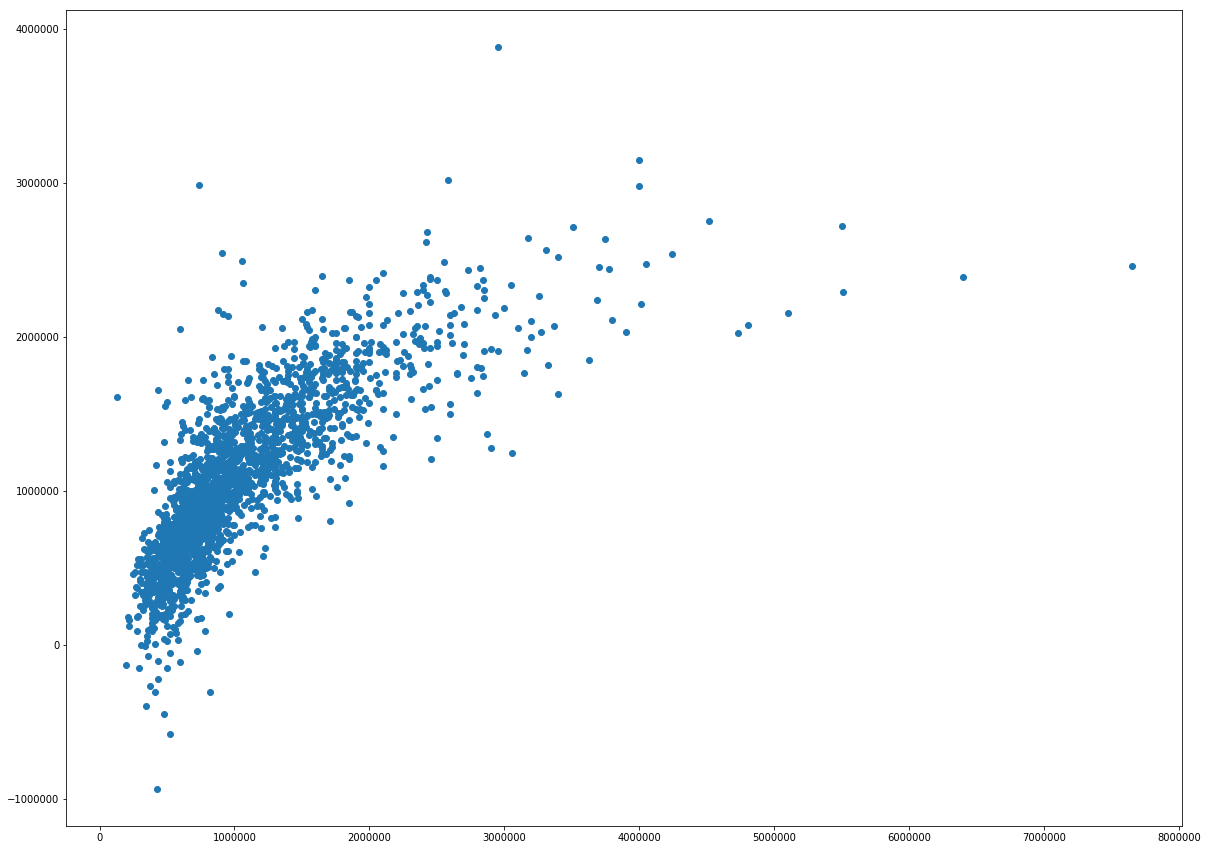

In [73]:
plt.figure(figsize=(20,15))
plt.scatter(y_test,y_pred)
plt.show()

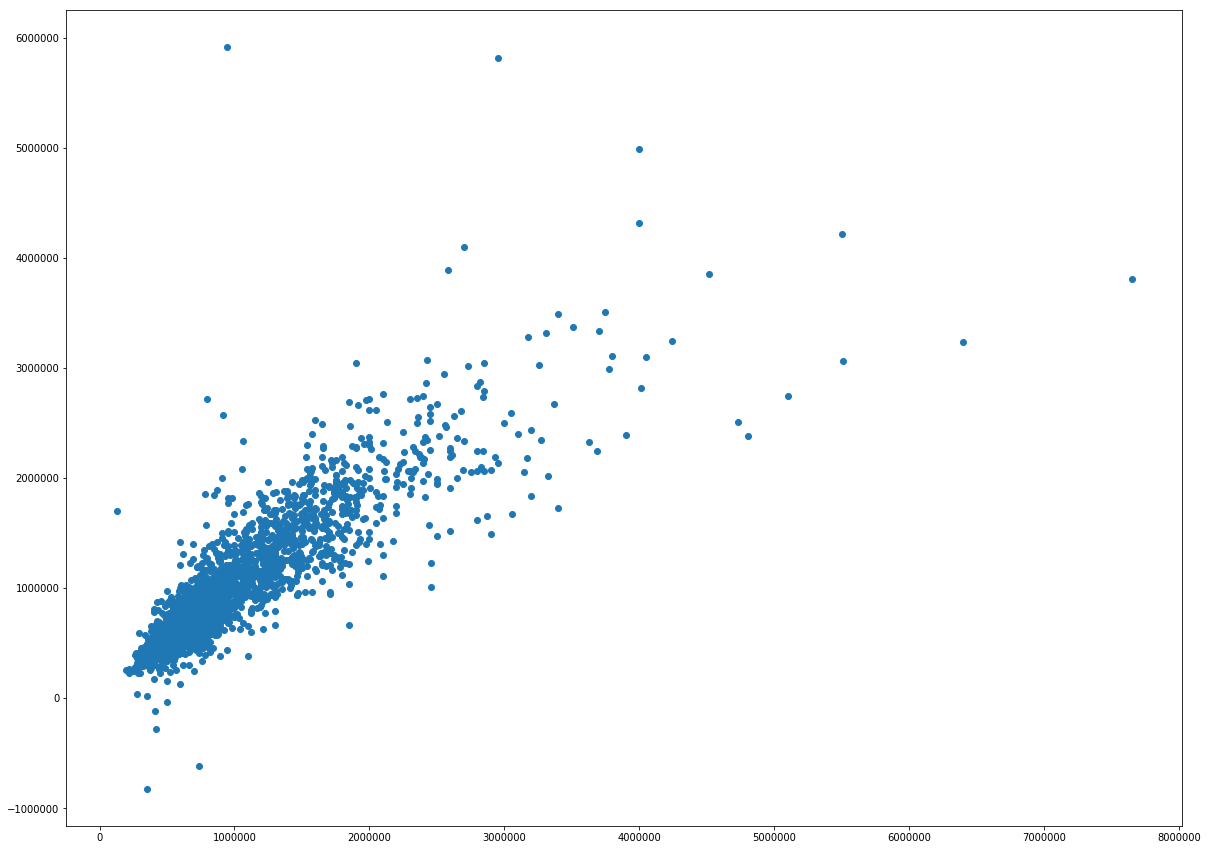

In [74]:
plt.figure(figsize=(20,15))
plt.scatter(y_test,y_pred_p)
plt.show()

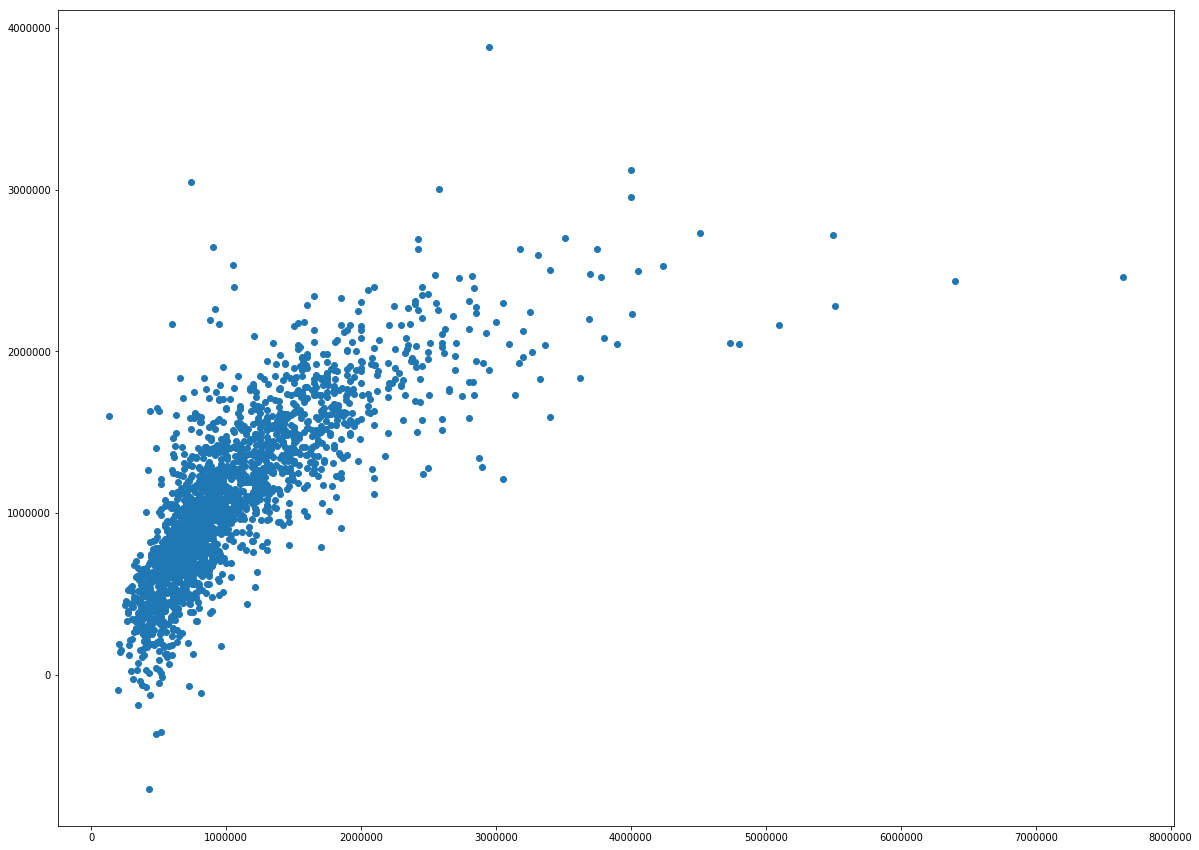

In [75]:
plt.figure(figsize=(20,15))
plt.scatter(y_test,y_pred_r)
plt.show()

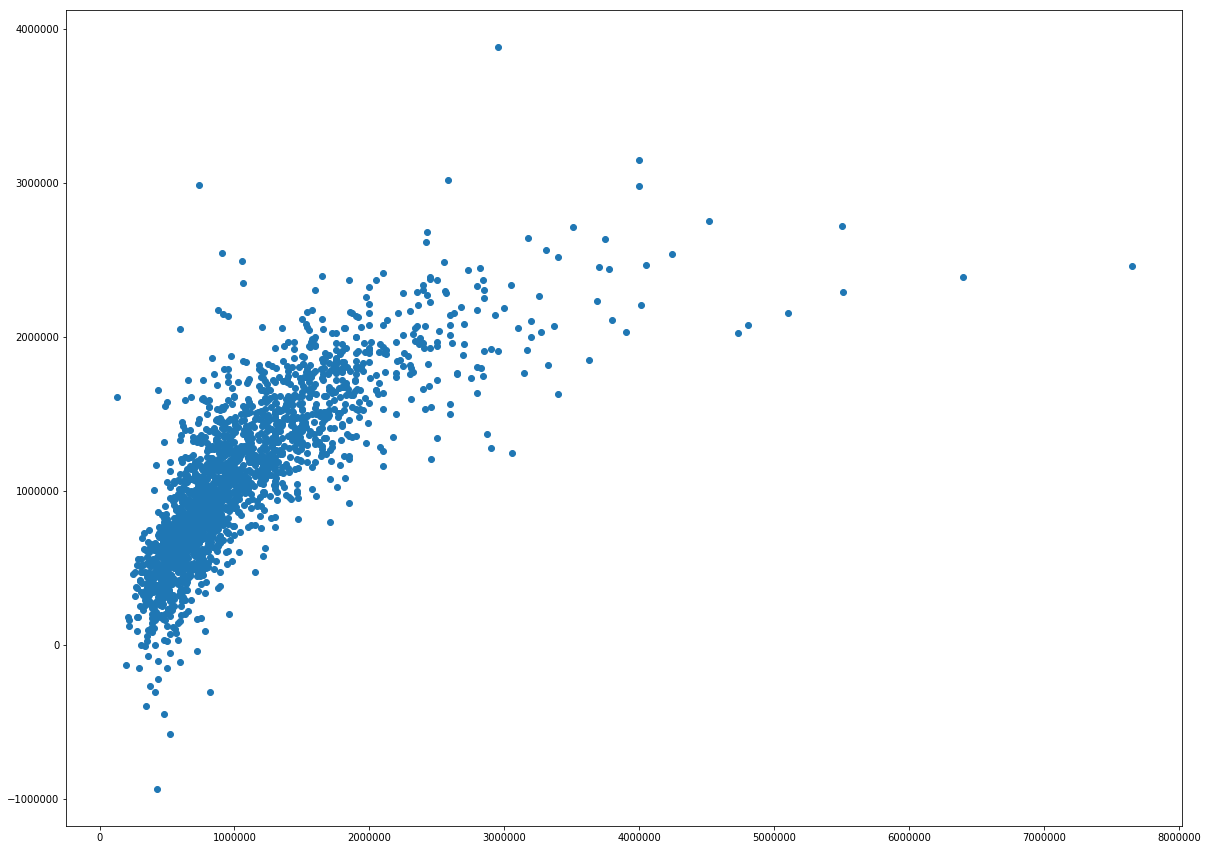

In [76]:
plt.figure(figsize=(20,15))
plt.scatter(y_test,y_pred_l)
plt.show()

In [77]:
corr = df.corr()

In [78]:
corr

,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
Rooms,1.000000,-0.579983,0.517718,-0.048423,-0.017318,0.289763,0.068674,0.613285,0.420493,0.099031,0.603150,-0.049272,-0.205097,0.096665,-0.005093,-0.100447
Type,-0.579983,1.000000,-0.419183,0.088179,0.021241,-0.240904,0.008063,-0.273788,-0.281780,-0.045246,-0.388990,0.320428,0.152362,0.002320,0.053642,0.098420
Price,0.517718,-0.419183,1.000000,-0.041462,-0.058529,-0.164975,0.109343,0.492481,0.250916,0.073536,0.520492,-0.307343,-0.125901,0.209786,0.090802,-0.053336
Method,-0.048423,0.088179,-0.041462,1.000000,-0.008489,-0.058832,-0.031344,-0.006614,-0.014382,-0.015780,-0.040639,0.024371,0.022126,-0.048818,0.025594,-0.020742
SellerG,-0.017318,0.021241,-0.058529,-0.008489,1.000000,0.026803,-0.002534,-0.029692,0.006835,-0.009812,-0.032581,0.010859,-0.000537,-0.057695,0.013905,0.061711
Distance,0.289763,-0.240904,-0.164975,-0.058832,0.026803,1.000000,0.438274,0.124044,0.265142,0.082449,0.155148,0.258462,-0.277766,0.215594,-0.094625,-0.061433
Postcode,0.068674,0.008063,0.109343,-0.031344,-0.002534,0.438274,1.000000,0.112776,0.049226,0.039998,0.081791,0.036819,-0.070475,0.430579,-0.013522,0.058542
Bathroom,0.613285,-0.273788,0.492481,-0.006614,-0.029692,0.124044,0.112776,1.000000,0.335331,0.081680,0.539717,0.166412,-0.114353,0.119573,0.036411,-0.062127
Car,0.420493,-0.281780,0.250916,-0.014382,0.006835,0.265142,0.049226,0.335331,1.000000,0.113427,0.331702,0.114340,-0.175219,0.061410,0.005498,-0.033258
Landsize,0.099031,-0.045246,0.073536,-0.015780,-0.009812,0.082449,0.039998,0.081680,0.113427,1.000000,0.082815,0.031474,-0.049916,0.026882,-0.009509,-0.014909


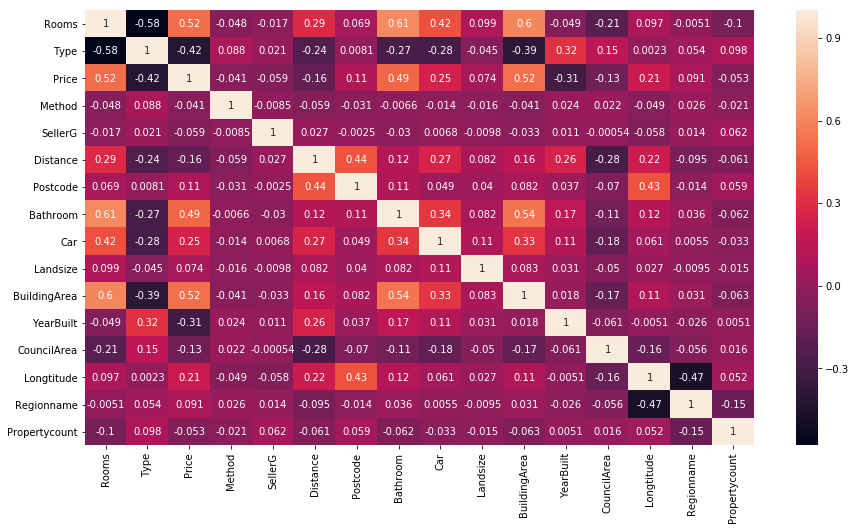

In [83]:
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True)
plt.show()